# Exploratory Data Analysis

A hotel owner owns two hotels, one is a city hotel and the other one is a resort hotel. The owner found that, many customers cancel the reservation and cause a loss in revenue. The owner would love to know more about the customers and know what causes people to cancel their reservation, and what type of customers has a higher possibility to cancel their reservation.

First, the owner would like to have an overview of the business of two hotels and see if we can find some interesting clues.

Here are some questions that I will need to look into:
- Which hotel is more demanding
- Which hotel has the higher cancelation rate
- Where do the guests come from? Do people from different countries have preferences in hotel types? Which country has the highest cancellation rate？
- How much do guests pay for a room per night? Do they pay different amount for the two hotels？ Which types of room has the highest cancellation rate?
- How does the price per night vary over the year? 
- In which month, do the hotels have the highest room reservation?
- Which month have the highest number of cancelations?


In [407]:
# Load all packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

### Load the data

In [408]:
hotel = pd.read_csv('D:\Jupyter_Notebook\Hotel_Demand\data\hotel_cleaned.csv')

In [409]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_datetime,arrival_date_month_number,arrival_datetime
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02,7,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-03,7,2015-07-01


In [410]:
hotel.dtypes

hotel                                object
is_canceled                           int64
lead_time                             int64
arrival_date_year                     int64
arrival_date_month                   object
arrival_date_week_number              int64
arrival_date_day_of_month             int64
stays_in_weekend_nights               int64
stays_in_week_nights                  int64
adults                                int64
children                              int64
babies                                int64
meal                                 object
country                              object
market_segment                       object
distribution_channel                 object
is_repeated_guest                     int64
previous_cancellations                int64
previous_bookings_not_canceled        int64
reserved_room_type                   object
assigned_room_type                   object
booking_changes                       int64
deposit_type                    

In [411]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119208.0,0.370764,0.483011,0.0,0.0,0.00,1.0,1.0
lead_time,119208.0,104.109045,106.875835,0.0,18.0,69.00,161.0,737.0
arrival_date_year,119208.0,2016.156466,0.707487,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119208.0,27.163638,13.601068,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119208.0,15.798730,8.781048,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119208.0,0.927035,0.995082,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119208.0,2.499178,1.897090,0.0,1.0,2.00,3.0,50.0
adults,119208.0,1.859204,0.575190,0.0,2.0,2.00,2.0,55.0
children,119208.0,0.104045,0.398839,0.0,0.0,0.00,0.0,10.0
babies,119208.0,0.007961,0.097510,0.0,0.0,0.00,0.0,10.0


In [412]:
hotel.describe(include=['object', 'category']).T

,count,unique,top,freq
hotel,119208,2,City Hotel,79162
arrival_date_month,119208,12,August,13861
meal,119208,5,BB,92234
country,119208,178,PRT,48482
market_segment,119208,8,Online TA,56408
distribution_channel,119208,5,TA/TO,97749
reserved_room_type,119208,9,A,85871
assigned_room_type,119208,11,A,74019
deposit_type,119208,3,No Deposit,104460
agent,119208,334,9.0,31922


#### Check the overall data information

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning

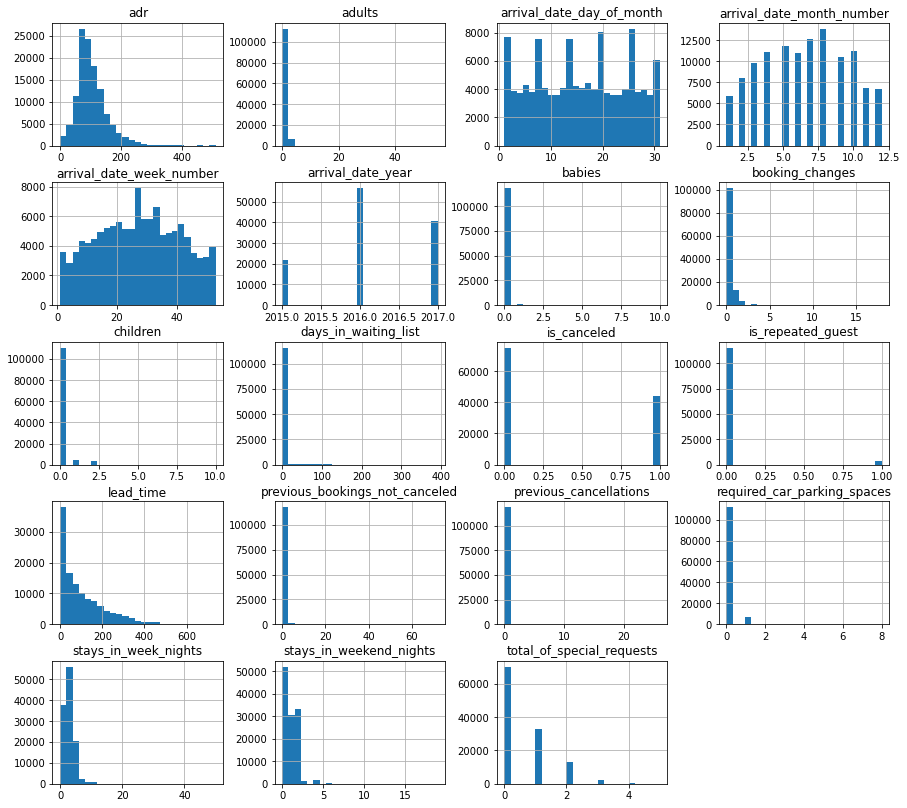

In [413]:
# Histgrams of all numerical data
all_hist = hotel.hist(bins=25,figsize=(15,14))

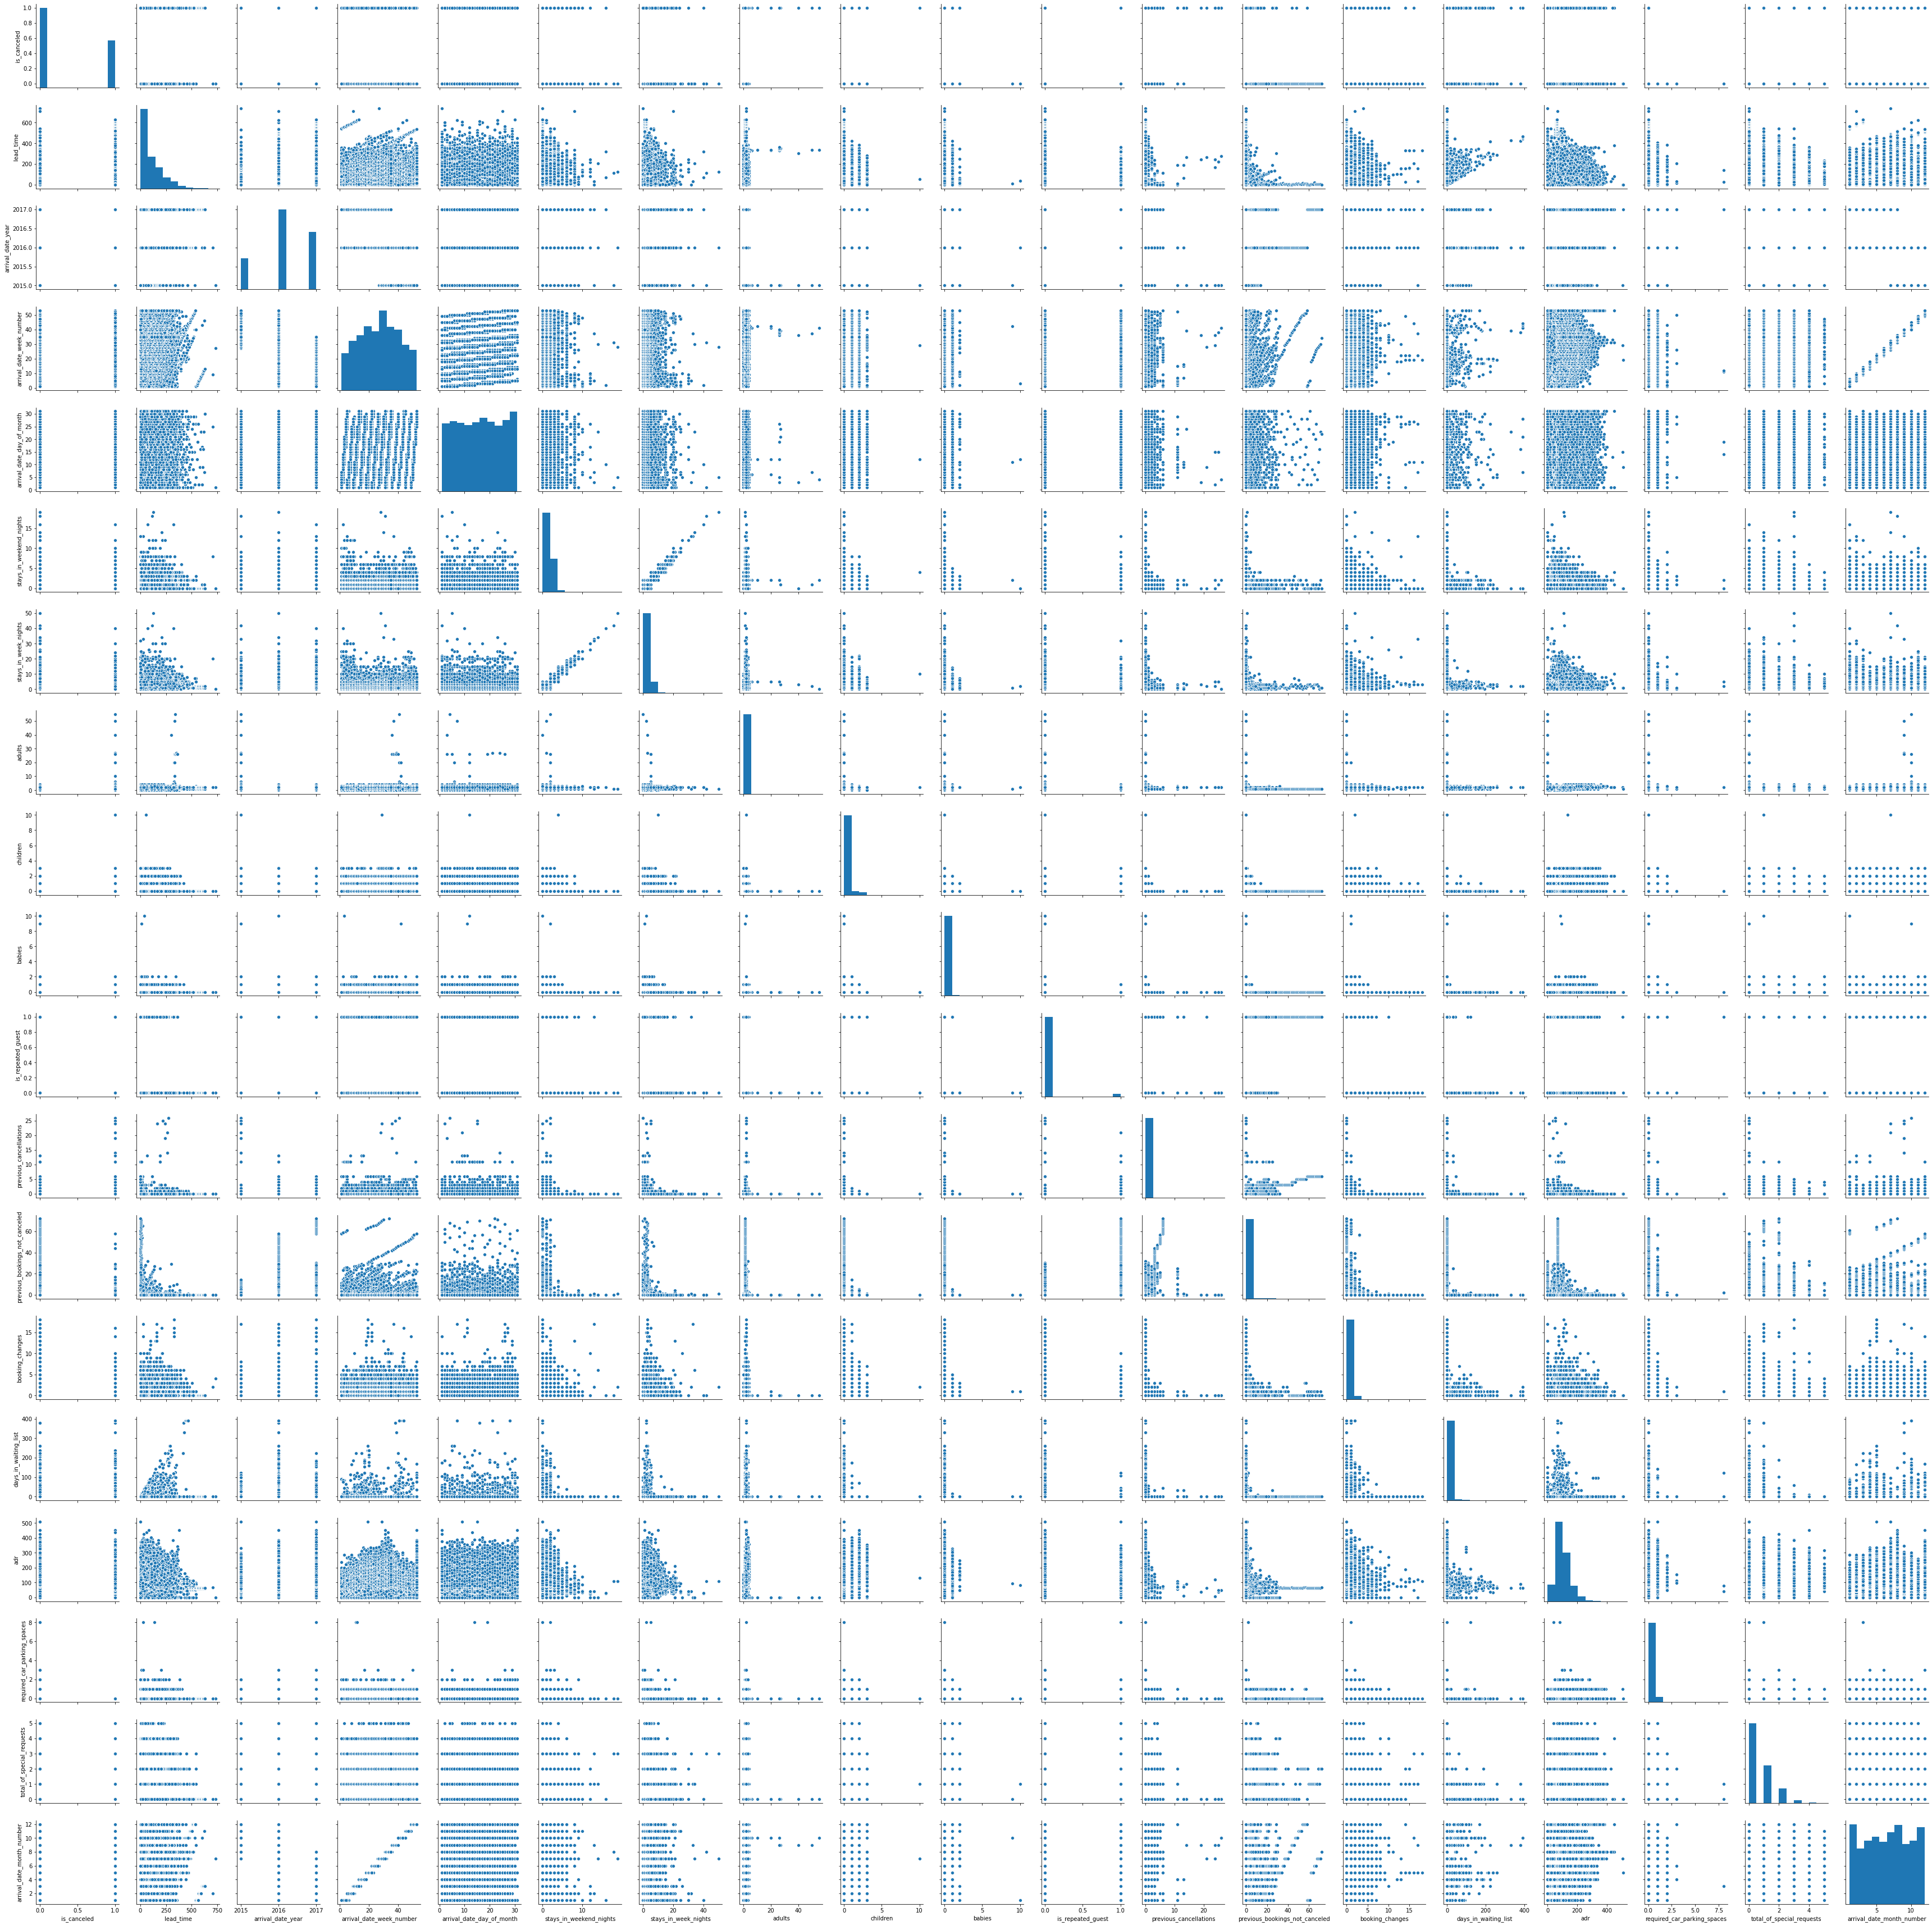

In [414]:
# Pair plot of all numerical data
sns.pairplot(hotel)

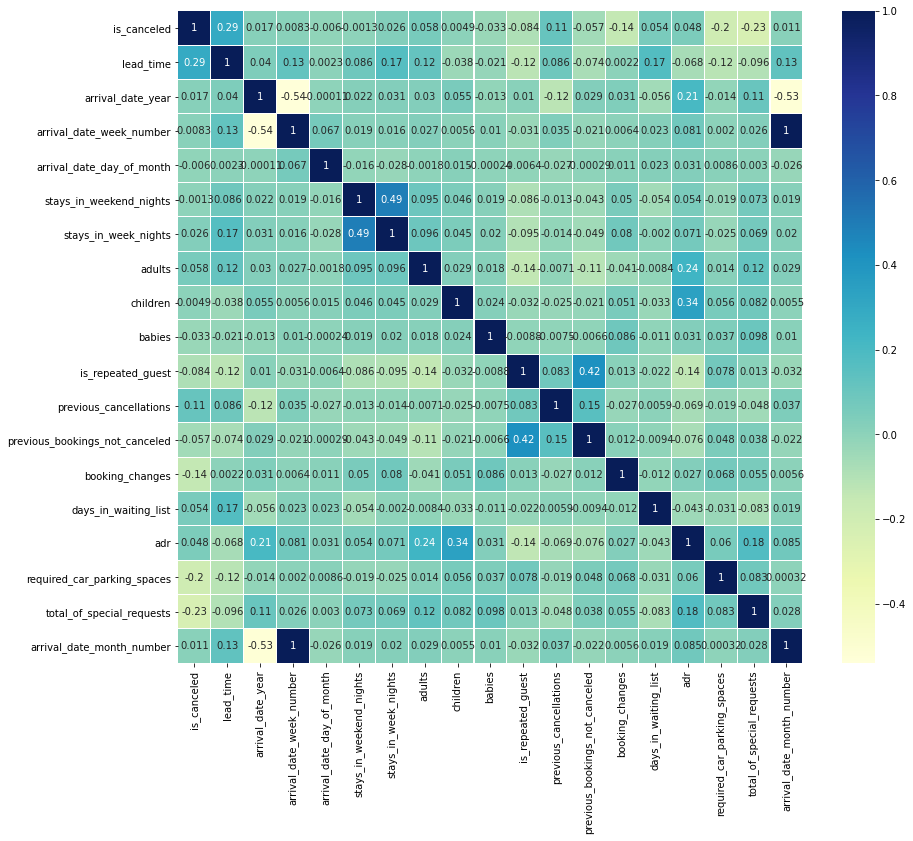

In [415]:
# Make a heatmap of the data 
plt.figure(figsize=(14,12))
sns.heatmap(hotel.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

There are no significantly high correlated variables. 

### EDA

#### Which hotel is more demanding

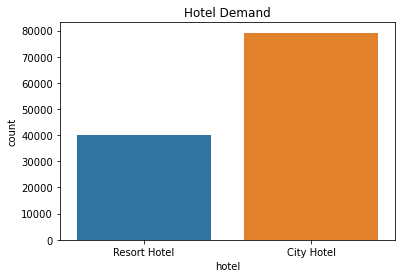

In [416]:
hotel_demand = sns.countplot(x='hotel',data=hotel).set_title('Hotel Demand')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/hotel_demand.png')

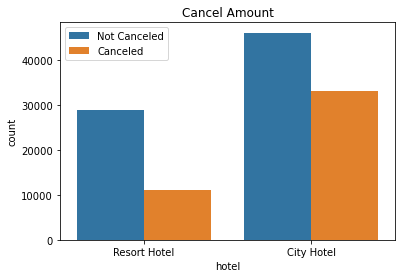

In [417]:
sns.countplot(x='hotel',data=hotel,hue='is_canceled').set_title('Cancel Amount')
plt.legend(['Not Canceled','Canceled'])

The city hotel is more demanding, but it also has more cancellation.

#### Which hotel has the higher cancelation rate

In [418]:
# group by type of hotel and cancellation status
hotel_cancel = hotel.groupby(['hotel'])[['is_canceled']].mean()
hotel_cancel = hotel_cancel.rename(columns={"is_canceled": "Cancellation Rate"})
hotel_cancel

,Cancellation Rate
hotel,
City Hotel,0.417852
Resort Hotel,0.277681


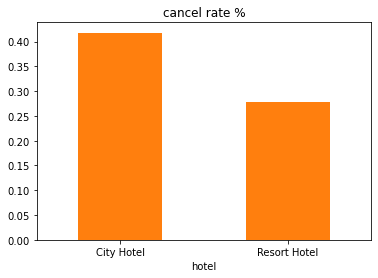

In [419]:
_ = hotel_cancel['Cancellation Rate'].plot(kind='bar',color='C1')
_ = plt.title('cancel rate %')
_ = plt.xticks(rotation='horizontal')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/hotel_cancellation_rate.png')

City hotel has higher cancellation rate (0.42) than resort hotel (0.28)

### Country

#### Where do the guests come from?

In [420]:
hotel['country'].value_counts().head(15)

PRT    48482
GBR    12119
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
USA     2093
CHE     1726
CN      1279
AUT     1263
SWE     1020
Name: country, dtype: int64

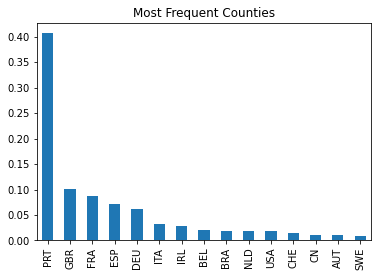

In [421]:
# Make a barplot to have an overall idea about the country
country_order = hotel['country'].value_counts(normalize=True).head(15).plot(kind = 'bar')
plt.title('Most Frequent Counties')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/country_order.png')

Most customers are from Europe, like Portugal, United Kingdom, France and Spain.

#### Country and hotel preference

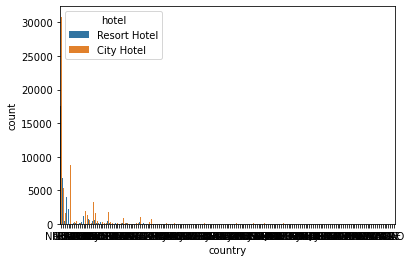

In [422]:
# See if there are any difference between hotels.
sns.countplot(x='country',hue = 'hotel',data = hotel)

This plot is too crowd that is not so useful.I will only plot the first most frequent 15 countries

In [423]:
# check the top 15 countriesfor city hotel
ch_country = hotel[hotel['hotel']=='City Hotel']['country'].value_counts()
ch_country_percent = hotel[hotel['hotel']=='City Hotel']['country'].value_counts(normalize = True)
ch_country = pd.DataFrame({'Country':ch_country.index,'City_Hotel_Count':ch_country.values,'City_Hotel_Percent':ch_country_percent})
ch_country.head(15)

,Country,City_Hotel_Count,City_Hotel_Percent
PRT,PRT,30860,0.389834
FRA,FRA,8791,0.111051
DEU,DEU,6082,0.076830
GBR,GBR,5307,0.067040
ESP,ESP,4604,0.058159
ITA,ITA,3302,0.041712
BEL,BEL,1894,0.023926
BRA,BRA,1792,0.022637
USA,USA,1614,0.020389
NLD,NLD,1589,0.020073


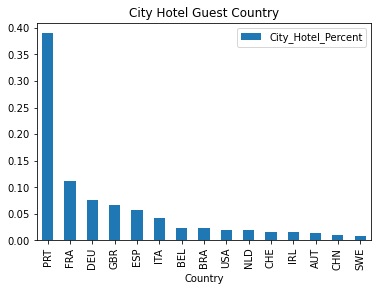

In [424]:
_ = ch_country.head(15).plot(x='Country',y='City_Hotel_Percent',kind='bar')
_ = plt.title('City Hotel Guest Country')

In [425]:
# check top 15 countries for resort hotel
rh_country = hotel[hotel['hotel']=='Resort Hotel']['country'].value_counts()
rh_country_percent = hotel[hotel['hotel']=='Resort Hotel']['country'].value_counts(normalize = True)
rh_country = pd.DataFrame({'Country':rh_country.index,'Resort_Hotel_Count':rh_country.values,'Resort_Hotel_Percent':rh_country_percent.values})
rh_country.head(15)

,Country,Resort_Hotel_Count,Resort_Hotel_Percent
0,PRT,17622,0.440044
1,GBR,6812,0.170104
2,ESP,3956,0.098786
3,IRL,2166,0.054088
4,FRA,1610,0.040204
5,DEU,1203,0.030040
6,CN,710,0.017730
7,NLD,514,0.012835
8,USA,479,0.011961
9,No country,462,0.011537


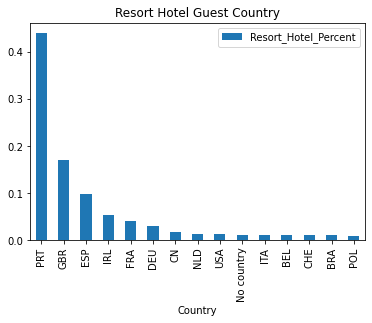

In [426]:
ax = rh_country.head(15).plot(x='Country',y='Resort_Hotel_Percent',kind='bar')
ax = plt.title('Resort Hotel Guest Country')

Notice here, there are 462 reservations (0.011537%) labeled as no country. Resort Hotel's customers might not want to reveal where they come from.

In [427]:
# combine the two hotels together, order by the total guest
country = pd.merge(ch_country,rh_country, how='outer', on='Country')
country['Total'] = country['Resort_Hotel_Count']+country['City_Hotel_Count']
country = country.sort_values(by='Total', ascending=False)
country15 = country.head(15)
country15

,Country,City_Hotel_Count,City_Hotel_Percent,Resort_Hotel_Count,Resort_Hotel_Percent,Total
0,PRT,30860.0,0.389834,17622.0,0.440044,48482.0
3,GBR,5307.0,0.067040,6812.0,0.170104,12119.0
1,FRA,8791.0,0.111051,1610.0,0.040204,10401.0
4,ESP,4604.0,0.058159,3956.0,0.098786,8560.0
2,DEU,6082.0,0.076830,1203.0,0.030040,7285.0
5,ITA,3302.0,0.041712,459.0,0.011462,3761.0
11,IRL,1208.0,0.015260,2166.0,0.054088,3374.0
6,BEL,1894.0,0.023926,448.0,0.011187,2342.0
7,BRA,1792.0,0.022637,430.0,0.010738,2222.0
9,NLD,1589.0,0.020073,514.0,0.012835,2103.0


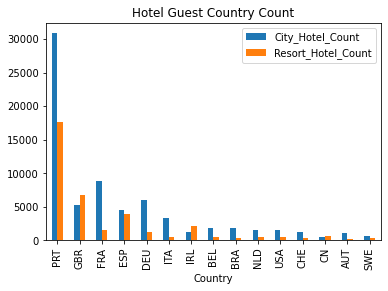

In [428]:
# Make a bar plot to see where does the most guests come from, and compare the teo hotels 
country15.plot(x="Country", y=["City_Hotel_Count",'Resort_Hotel_Count'],kind="bar")
plt.title('Hotel Guest Country Count')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Hotel_Guest_Country_Count.png')

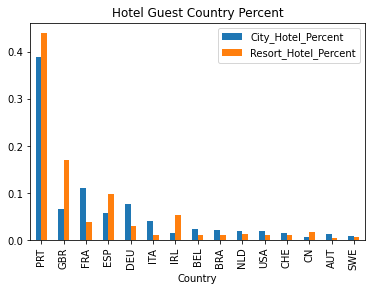

In [429]:
# Use percentage to remake the barplot and compare the two hotels
country15.plot(x="Country", y=["City_Hotel_Percent",'Resort_Hotel_Percent'],kind="bar")
plt.title('Hotel Guest Country Percent')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Hotel_Guest_Country_Percent.png')

Most guests come from Europe.Guest from Portugal, UK, Spain,Ireland have a preference to Resort Hotel. Guests from France,Germany, Italy  prefer City Hotel over Resort Hotel.

#### Which country has the highest cancellation rate？

In [430]:
# group the hotel data by hotel type, country and is_canceled
country_cancel = hotel.groupby(['hotel','country'])[['is_canceled']].mean()
country_cancel = country_cancel.rename(columns={"is_canceled": "Cancellation Rate"})
country_cancel

Cancellation Rate
hotel        country                   
City Hotel   ABW               0.000000
             AGO               0.585799
             AIA               0.000000
             ALB               0.111111
             AND               1.000000
...                                 ...
Resort Hotel VEN               0.333333
             VNM               0.000000
             ZAF               0.277778
             ZMB               0.000000
             ZWE               0.000000

[293 rows x 1 columns]

In [431]:
# Take City Hotel's canceled order
city_county_cancel = country_cancel.loc['City Hotel']
city_county_cancel = city_county_cancel.reset_index()
city_county_cancel = city_county_cancel.rename(columns={"Cancellation Rate": "City Cancel %",'country':"Country"})
city_county_cancel

,Country,City Cancel %
0,ABW,0.000000
1,AGO,0.585799
2,AIA,0.000000
3,ALB,0.111111
4,AND,1.000000
...,...,...
162,VGB,1.000000
163,VNM,0.333333
164,ZAF,0.419355
165,ZMB,1.000000


In [432]:
# I would like to compare the cancellation rate for the most frequent countries. 
# Merge the cancellation tabel to the previous country tabel. 
country = pd.merge(country,city_county_cancel, how='left', on='Country')
country

,Country,City_Hotel_Count,City_Hotel_Percent,Resort_Hotel_Count,Resort_Hotel_Percent,Total,City Cancel %
0,PRT,30860.0,0.389834,17622.0,0.440044,48482.0,0.650259
1,GBR,5307.0,0.067040,6812.0,0.170104,12119.0,0.294140
2,FRA,8791.0,0.111051,1610.0,0.040204,10401.0,0.195882
3,ESP,4604.0,0.058159,3956.0,0.098786,8560.0,0.288010
4,DEU,6082.0,0.076830,1203.0,0.030040,7285.0,0.176258
...,...,...,...,...,...,...,...
173,CYM,NaN,NaN,1.0,0.000025,NaN,NaN
174,FJI,NaN,NaN,1.0,0.000025,NaN,NaN
175,BWA,NaN,NaN,1.0,0.000025,NaN,NaN
176,PLW,NaN,NaN,1.0,0.000025,NaN,NaN


In [433]:
# filter the resort cancellation rate
resort_county_cancel = country_cancel.loc['Resort Hotel']
resort_county_cancel = resort_county_cancel.reset_index()
resort_county_cancel = resort_county_cancel.rename(columns={"Cancellation Rate": "Resort Cancel %",'country':"Country"})
resort_county_cancel

,Country,Resort Cancel %
0,AGO,0.291667
1,ALB,0.333333
2,AND,0.600000
3,ARE,0.727273
4,ARG,0.157895
...,...,...
121,VEN,0.333333
122,VNM,0.000000
123,ZAF,0.277778
124,ZMB,0.000000


In [434]:
# Compare with the most frequent countries
country = pd.merge(country,resort_county_cancel, how='left', on='Country')
country

,Country,City_Hotel_Count,City_Hotel_Percent,Resort_Hotel_Count,Resort_Hotel_Percent,Total,City Cancel %,Resort Cancel %
0,PRT,30860.0,0.389834,17622.0,0.440044,48482.0,0.650259,0.422086
1,GBR,5307.0,0.067040,6812.0,0.170104,12119.0,0.294140,0.130799
2,FRA,8791.0,0.111051,1610.0,0.040204,10401.0,0.195882,0.131056
3,ESP,4604.0,0.058159,3956.0,0.098786,8560.0,0.288010,0.215116
4,DEU,6082.0,0.076830,1203.0,0.030040,7285.0,0.176258,0.121363
...,...,...,...,...,...,...,...,...
173,CYM,NaN,NaN,1.0,0.000025,NaN,NaN,0.000000
174,FJI,NaN,NaN,1.0,0.000025,NaN,NaN,1.000000
175,BWA,NaN,NaN,1.0,0.000025,NaN,NaN,0.000000
176,PLW,NaN,NaN,1.0,0.000025,NaN,NaN,0.000000


In [435]:
country15 = country.head(15)
country15

,Country,City_Hotel_Count,City_Hotel_Percent,Resort_Hotel_Count,Resort_Hotel_Percent,Total,City Cancel %,Resort Cancel %
0,PRT,30860.0,0.389834,17622.0,0.440044,48482.0,0.650259,0.422086
1,GBR,5307.0,0.067040,6812.0,0.170104,12119.0,0.294140,0.130799
2,FRA,8791.0,0.111051,1610.0,0.040204,10401.0,0.195882,0.131056
3,ESP,4604.0,0.058159,3956.0,0.098786,8560.0,0.288010,0.215116
4,DEU,6082.0,0.076830,1203.0,0.030040,7285.0,0.176258,0.121363
5,ITA,3302.0,0.041712,459.0,0.011462,3761.0,0.379467,0.174292
6,IRL,1208.0,0.015260,2166.0,0.054088,3374.0,0.331126,0.199446
7,BEL,1894.0,0.023926,448.0,0.011187,2342.0,0.219113,0.131696
8,BRA,1792.0,0.022637,430.0,0.010738,2222.0,0.406808,0.234884
9,NLD,1589.0,0.020073,514.0,0.012835,2103.0,0.208307,0.108949


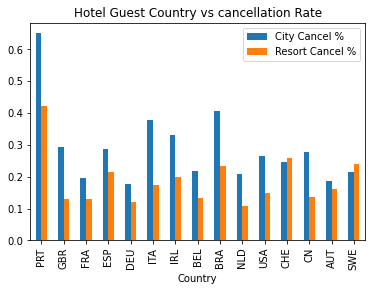

In [436]:
# Make a Bar plot to check the cancellation rate of the most frequent countries
country15.plot(x="Country", y=["City Cancel %",'Resort Cancel %'],kind="bar")
plt.title('Hotel Guest Country vs cancellation Rate')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Hotel_Guest_Country_Cancellation_Rate.png')

Overall, the cancellation rate of City Hotel is higher than that of Resort Hotel.Notice that Portugal has a relatively high cancellation rate (65%) for City Hotel, we could look into it and see what caused this. 

#### How much do guests pay for a room per night?

In [437]:
#calculate price per person
hotel["adr_pp"] = hotel["adr"] / (hotel["adults"] + hotel["children"])
hotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_datetime,arrival_date_month_number,arrival_datetime,adr_pp
104474,City Hotel,0,34,2017,January,3,18,0,1,1,...,Transient-Party,75.0,0,0,Check-Out,2017-01-19,2017-01-19,1,2017-01-18,75.0
30779,Resort Hotel,0,40,2016,December,49,2,0,2,2,...,Transient,63.0,0,2,Check-Out,2016-12-04,2016-12-04,12,2016-12-02,31.5
102066,City Hotel,0,0,2016,November,48,23,0,1,2,...,Transient,0.0,0,0,Check-Out,2016-11-24,2016-11-24,11,2016-11-23,0.0
8506,Resort Hotel,1,258,2016,October,41,2,2,3,1,...,Transient,52.6,0,1,Canceled,2016-01-20,2016-01-20,10,2016-10-02,52.6
40324,City Hotel,1,22,2015,July,30,22,0,2,2,...,Transient-Party,62.0,0,0,Canceled,2015-07-02,2015-07-02,7,2015-07-22,31.0


In [438]:
# Only consider the room price for actual orders
actual_guest = hotel.loc[hotel["is_canceled"] == 0] 
room_prices = actual_guest[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

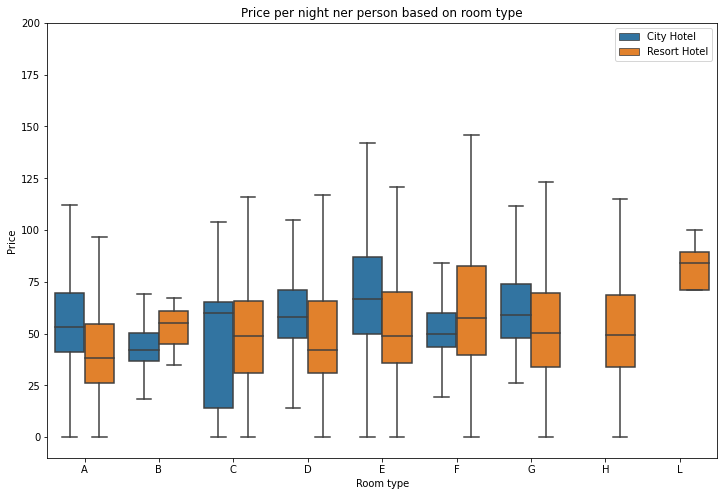

In [439]:
# Make a box plot for price against room type
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",y="adr_pp",hue="hotel",data=room_prices,fliersize=0)
plt.title("Price per night ner person based on room type")
plt.ylim(-10,200)
plt.xlabel("Room type")
plt.ylabel("Price")
plt.legend(loc="upper right")


Report Hotel has more room type.RH has 9 room types and City Hotel has 7. For Room type A,D,E and G, people pay more for City Hotel. For room type B and F, people pay more for Resort Hotel. 

#### Which room type has the highest cancellation rate

In [440]:
room_type_cancel_rate = hotel.groupby(['hotel', 'reserved_room_type'])[['is_canceled']].mean()
room_type_cancel_rate = room_type_cancel_rate.rename(columns={"is_canceled": "cancel rate"})
room_type_cancel_rate

cancel rate
hotel        reserved_room_type             
City Hotel   A                      0.435991
             B                      0.330036
             C                      0.384615
             D                      0.352941
             E                      0.324658
             F                      0.391499
             G                      0.246888
Resort Hotel A                      0.272875
             B                      0.000000
             C                      0.330065
             D                      0.263052
             E                      0.282818
             F                      0.162749
             G                      0.400000
             H                      0.407654
             L                      0.333333

In [441]:
# check the order count for different room type
room_count = hotel.groupby(['hotel', 'reserved_room_type'])[['is_canceled']].count()
room_count

is_canceled
hotel        reserved_room_type             
City Hotel   A                         62483
             B                          1112
             C                            13
             D                         11747
             E                          1537
             F                          1788
             G                           482
Resort Hotel A                         23388
             B                             3
             C                           918
             D                          7432
             E                          4982
             F                          1106
             G                          1610
             H                           601
             L                             6

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning

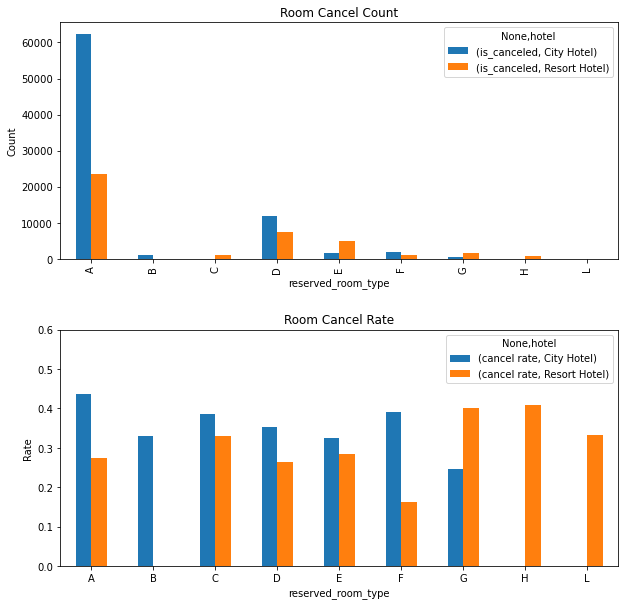

In [442]:
fig, axes = plt.subplots(2,1,figsize=(10,10))
plt.subplots_adjust(hspace=0.3)
axes0 = room_count.unstack('hotel').plot(kind='bar',ax=axes[0])
axes0.set_title('Room Cancel Count')
axes0.set_ylabel('Count')
plt.xticks(rotation = 'horizontal')


axes1 = room_type_cancel_rate.unstack('hotel').plot(kind='bar',ax=axes[1])
axes1.set_title('Room Cancel Rate')
axes1.set_ylabel('Rate')
axes1 = plt.ylim(0,0.6)
axes1 = plt.xticks(rotation = 'horizontal')

plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Cancellation_by_Room_type.png')

For both of the hotels, room type A has more orders.
City Hotel room type A has the highest cancellation rate. It is noticeable that room type B of Resort Hotel has 0% cancellation rate. 

#### Bookings by market segment

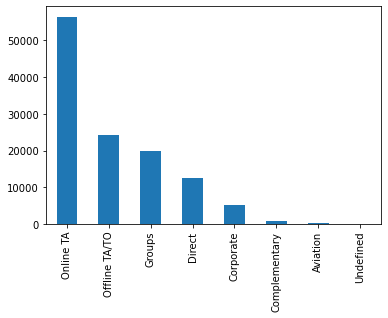

In [443]:
# Make a histgram for the market segment
hotel['market_segment'].value_counts().plot(kind='bar')

More than half of the reservations are made through online and offline travel agency.

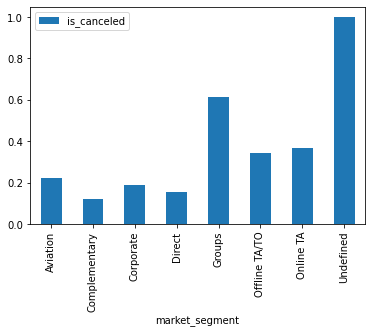

In [444]:
hotel.groupby(['market_segment'])[['is_canceled']].mean().plot(kind='bar')

In [445]:
market = hotel.groupby(['hotel','market_segment'])[['is_canceled']].mean()
market

is_canceled
hotel        market_segment             
City Hotel   Aviation           0.221277
             Complementary      0.106262
             Corporate          0.214982
             Direct             0.173913
             Groups             0.689161
             Offline TA/TO      0.428759
             Online TA          0.374544
             Undefined          1.000000
Resort Hotel Complementary      0.164179
             Corporate          0.152278
             Direct             0.134869
             Groups             0.424284
             Offline TA/TO      0.152075
             Online TA          0.352417

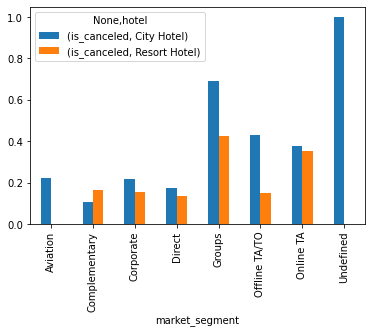

In [446]:
market.unstack('hotel').plot(kind='bar')

For both Hotels, Groups orders have a high cancellation rate. Group reservations is relatively higher for City Hotels (almost 70%).

### Overall buesiness

In [447]:
# Find demand over time
hotel_demand = hotel.groupby(['hotel','arrival_date_year','arrival_date_month_number'])[['is_canceled']].count()
hotel_demand = hotel_demand.rename(columns={'is_canceled':'guest_number'})

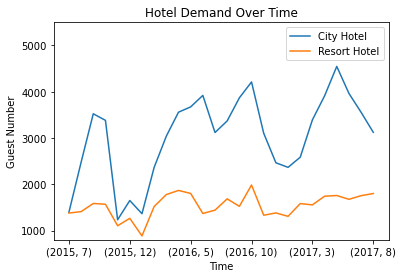

In [448]:
# Make a line plot to check the business over time
hotel_demand_plot = hotel_demand.unstack('hotel').plot(kind='line')
plt.title('Hotel Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Guest Number')
plt.ylim(800,5500)
plt.legend(['City Hotel','Resort Hotel'])
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/hotel_demand_plot.png')

There is an upward trend in order volume! But we should use statistical model to analyze if this trend is due to randomness or there is an actual increase in demand. We can also see that the demand for the City Hotel in winter is lower, and it bounced back in the spring. The fluctuation of the Resort Hotel is smaller, but we can still see the demand is less in winter.

In [449]:
# Find price over time
adr_pp_time = hotel.groupby(['hotel','arrival_date_year','arrival_date_month_number'])[['adr_pp']].mean()
#adr_pp_time

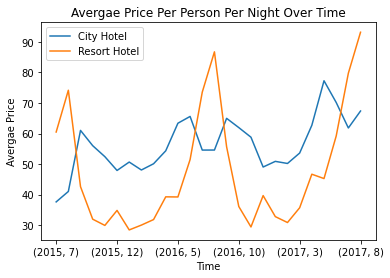

In [450]:
# Make a line plot to check the price over time
adr_pp_plot = adr_pp_time.unstack('hotel').plot(kind='line')
plt.title('Avergae Price Per Person Per Night Over Time')
plt.xlabel('Time')
plt.ylabel('Avergae Price')
plt.legend(['City Hotel','Resort Hotel'])
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/adr_pp_plot.png')

The average price per person per night varies a lot over time (especially the Resort Hotel). By comparing the demand figure and the price figure, we can see that the shape of both figures of the City Hotel is similiar. The trend of the both figures of the Resort Hotel is also similiar, but the price has bigger fluctuation. 

#### How does the price per night vary over the year?

In [451]:
montly_price = hotel[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

In [452]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [453]:
# Order by month
montly_price["arrival_date_month"] = pd.Categorical(montly_price["arrival_date_month"], categories=month_sorted, ordered=True)

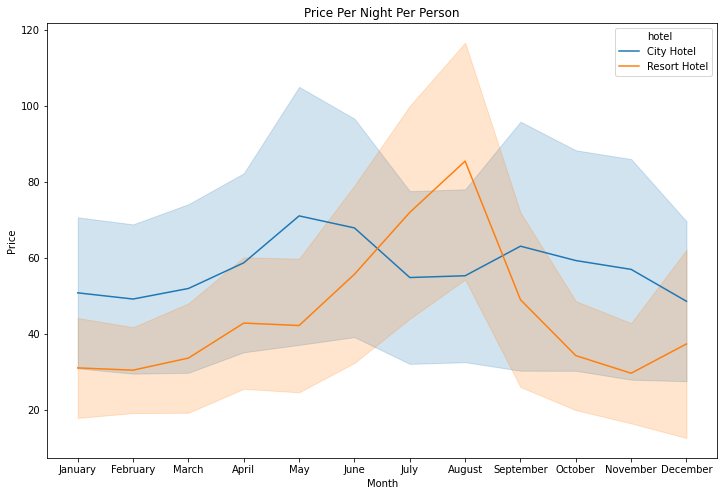

In [454]:
# Make a line plot fot price
plt.figure(figsize=(12, 8))
Price_Per_Night_Per_Person = sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=montly_price, ci="sd")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title('Price Per Night Per Person')
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Price_Per_Night_Per_Person.png')

In Spring and Autumn, the City hotel is a little bit more expensive than summer
In summer time, resort hotel is more expensive, and it is more expensive than city hotel.

#### In which month, do the hotels have the highest room reservation?

Text(0.5, 1.0, 'Guest per month')

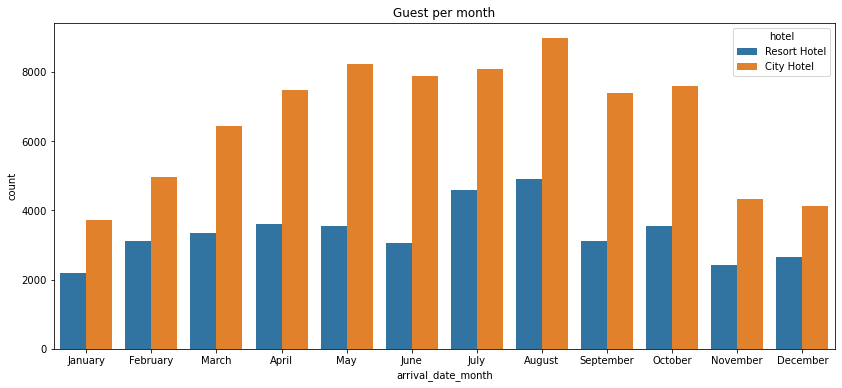

In [455]:
# Use countplot function to plot the reservation numbers over the month
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month',hue = 'hotel',data = hotel, order = month_sorted)
plt.title('Guest per month')

However, notice that the data is from June 2015 to August 2017.So, we have 3 July and August while 2 other months.We need to normalize the data

In [456]:
# Only consider the orders that did not been cancelled
resort_notcanceled = hotel.loc[(hotel["hotel"] == "Resort Hotel") & (hotel["is_canceled"] == 0)]
city_notcanceled = hotel.loc[(hotel["hotel"] == "City Hotel") & (hotel["is_canceled"] == 0)]

In [457]:
resort_number_monthly = resort_notcanceled.groupby("arrival_date_month")["hotel"].count()
city_number_monthly = city_notcanceled.groupby("arrival_date_month")["hotel"].count()

In [458]:
# put all information into a dataframe
monthly_business = pd.DataFrame({'month':resort_number_monthly.index,'resort':resort_number_monthly.values,'city':city_number_monthly.values})
monthly_business

,month,resort,city
0,April,2550,4010
1,August,3257,5367
2,December,2014,2377
3,February,2308,3051
4,January,1866,2249
5,July,3137,4770
6,June,2037,4358
7,March,2570,4049
8,May,2535,4568
9,November,1975,2676


In [459]:
# melt the dataframe into tidy data
monthly_business = pd.melt(monthly_business,id_vars='month',value_name='count',var_name='hotel')
monthly_business

,month,hotel,count
0,April,resort,2550
1,August,resort,3257
2,December,resort,2014
3,February,resort,2308
4,January,resort,1866
5,July,resort,3137
6,June,resort,2037
7,March,resort,2570
8,May,resort,2535
9,November,resort,1975


In [460]:
# Order the data by month
monthly_business["month"] = pd.Categorical(monthly_business["month"], categories=month_sorted,ordered=True)
monthly_business

,month,hotel,count
0,April,resort,2550
1,August,resort,3257
2,December,resort,2014
3,February,resort,2308
4,January,resort,1866
5,July,resort,3137
6,June,resort,2037
7,March,resort,2570
8,May,resort,2535
9,November,resort,1975


In [461]:
# Normalize the data since the count of months are different
monthly_business.loc[(monthly_business["month"] == "July") | (monthly_business["month"] == "August"),"count"] /= 3
monthly_business.loc[~((monthly_business["month"] == "July") | (monthly_business["month"] == "August")),"count"] /= 2

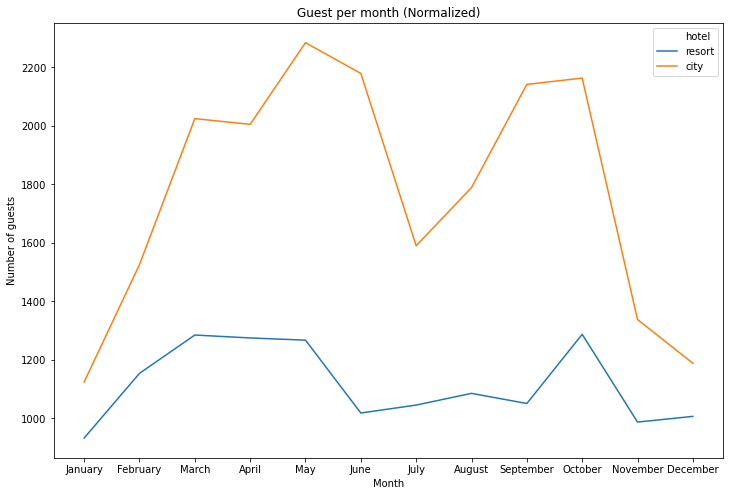

In [462]:
plt.figure(figsize=(12, 8))
Guest_per_month = sns.lineplot(x = "month", y="count", hue="hotel", data=monthly_business)
plt.title("Guest per month (Normalized)")
plt.xlabel("Month")
plt.ylabel("Number of guests")
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Guest_per_month.png')

The City hotel has more guests during spring and autumn, when the prices are also higher.

The Resort Hotel has slightly less customers from June to September, while the price is higher.

Both hotel has less customers in winter


#### Which month have the highest number of cancelations?

In [463]:
# Make a set of data for each type of hotels, and group the data by month
book_per_month_resort = hotel.loc[(hotel["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
cancel_per_month_resort = hotel.loc[(hotel["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

book_per_month_city = hotel.loc[(hotel["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cancel_per_month_city = hotel.loc[(hotel["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [464]:
# put all the resort information into one dataframe
cancel_resort = pd.DataFrame({"Hotel": "Resort Hotel","Month": list(book_per_month_resort.index),
                              "Count": list(book_per_month_resort.values),
                              "Cancelations": list(cancel_per_month_resort.values)})
cancel_resort

,Hotel,Month,Count,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3333,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [465]:
# put all the city information into one dataframe
cancel_city = pd.DataFrame({"Hotel": "City Hotel","Month": list(book_per_month_city.index),
                              "Count": list(book_per_month_city.values),
                              "Cancelations": list(cancel_per_month_city.values)})
cancel_city

,Hotel,Month,Count,Cancelations
0,City Hotel,April,7469,3459
1,City Hotel,August,8967,3600
2,City Hotel,December,4114,1737
3,City Hotel,February,4950,1899
4,City Hotel,January,3730,1481
5,City Hotel,July,8071,3301
6,City Hotel,June,7885,3527
7,City Hotel,March,6433,2384
8,City Hotel,May,8221,3653
9,City Hotel,November,4336,1660


In [466]:
# Put all the information into one dataframe
cancel = pd.concat([cancel_resort, cancel_city], ignore_index=True)
cancel

,Hotel,Month,Count,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3333,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [467]:
# Calculate the cancel_rate by month
cancel['cancel_rate'] = cancel['Cancelations']/cancel['Count']
cancel

,Hotel,Month,Count,Cancelations,cancel_rate
0,Resort Hotel,April,3609,1059,0.293433
1,Resort Hotel,August,4894,1637,0.334491
2,Resort Hotel,December,2645,631,0.238563
3,Resort Hotel,February,3102,794,0.255964
4,Resort Hotel,January,2191,325,0.148334
5,Resort Hotel,July,4573,1436,0.314017
6,Resort Hotel,June,3044,1007,0.330815
7,Resort Hotel,March,3333,763,0.228923
8,Resort Hotel,May,3559,1024,0.287721
9,Resort Hotel,November,2435,460,0.188912


In [468]:
# Order the data by month
cancel["Month"] = pd.Categorical(cancel["Month"], categories=month_sorted,ordered=True)
cancel

,Hotel,Month,Count,Cancelations,cancel_rate
0,Resort Hotel,April,3609,1059,0.293433
1,Resort Hotel,August,4894,1637,0.334491
2,Resort Hotel,December,2645,631,0.238563
3,Resort Hotel,February,3102,794,0.255964
4,Resort Hotel,January,2191,325,0.148334
5,Resort Hotel,July,4573,1436,0.314017
6,Resort Hotel,June,3044,1007,0.330815
7,Resort Hotel,March,3333,763,0.228923
8,Resort Hotel,May,3559,1024,0.287721
9,Resort Hotel,November,2435,460,0.188912


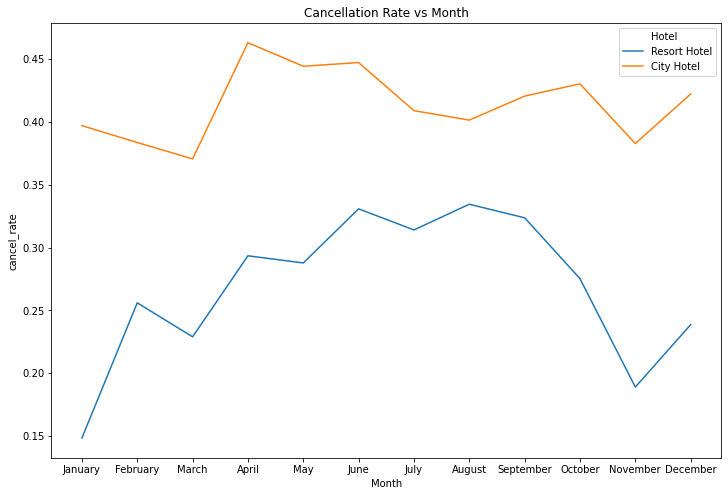

In [469]:
plt.figure(figsize=(12, 8))
Cancellation_Rate_by_Month = sns.lineplot(x = "Month", y = "cancel_rate" , hue="Hotel",data=cancel)
plt.title("Cancellation Rate vs Month")
plt.savefig('D:/Jupyter_Notebook/Hotel_Demand/figs/Cancellation_Rate_by_Month.png')

City Hotel has higher cancellation rate in spring time and lower rate in winter.
Resort hotel has lower cancellation rate in winter and higher rate in summer.

### Summary

From the following figures, we can tell that the City Hotel has more reservations. However, the cancellation of the City Hotel is also higher than that of the Resort Hotel.

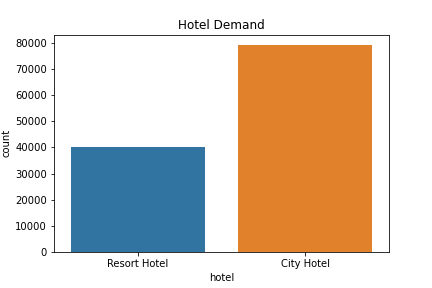

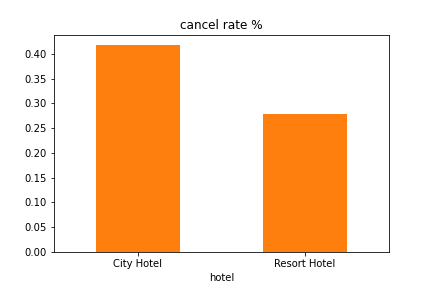

In [470]:
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/hotel_demand.png',width=400, height=400))
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/hotel_cancellation_rate.png',width=400, height=400))

Most guests are from Europe Countries. Portugal guests are the majority. However, Portugal guests have a relatively high cancellation rate to the City Hotel (almost 70%). Overall, the City Hotel has the higher cancellation rate.We could do more analysis and see what causes this. 

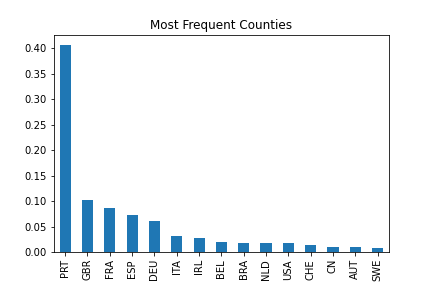

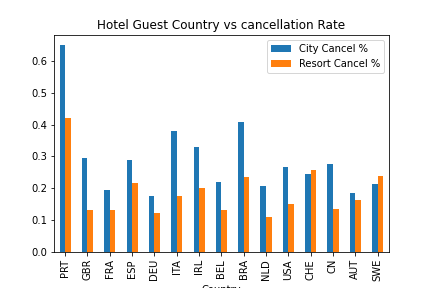

In [471]:
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/country_order.png',width=400, height=400))
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/Hotel_Guest_Country_Cancellation_Rate.png',width=400, height=400))

From the hotel demand figure, we can see an upward trend in order volume. But we need to use statistical model to analyze if this trend is due to randomness or there is an actual increase in demand.
The average price per person per night varies a lot over time (especially the Resort Hotel). By comparing the demand figure and the price figure, we can see that the shape of both figures of the City Hotel is similiar. The trend of the both figures of the Resort Hotel is also similiar, but the price has bigger fluctuation. We may say that the demand and price is somehow correlated. 

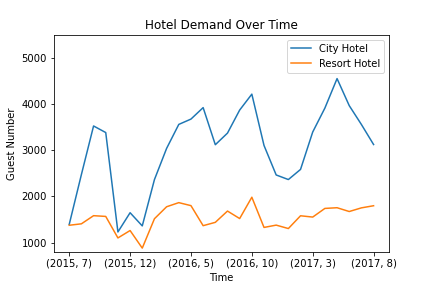

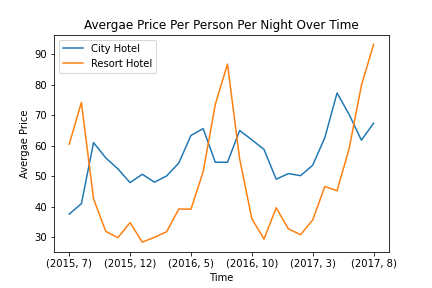

In [472]:
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/hotel_demand_plot.png',width=400, height=400))
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/adr_pp_plot.png',width=400, height=400))

From the "Price Per Night Per Person" figures, we can see that the City Hotel charges more in the Spring and Autumn, and the Resort Hotel charges more in the summer.

From the "Guest Per Month" figure, we can see that the City Hotel has more guests during the Spring and Autumn. This could explained the increasing price : increasing demand in the Spring and Autumn drives up prices. That the number of guest decreased during summer time for the Resort Hotel. However, the price for the Resort Hotel goes up during summer. 

Compared the demand and price figures with the "Cancellation Rate vs Month" figure. We see that there is a increase in cancellation from March to September for the Resort Hotel.Compare the cancellation with the price figure, it looks like that the cancellation rate for the Resort Hotel goes up when the price goes up. The cancellation rate figure for City Hotel also has a similiar shape as the price figure. The cancellation could be price driven. 

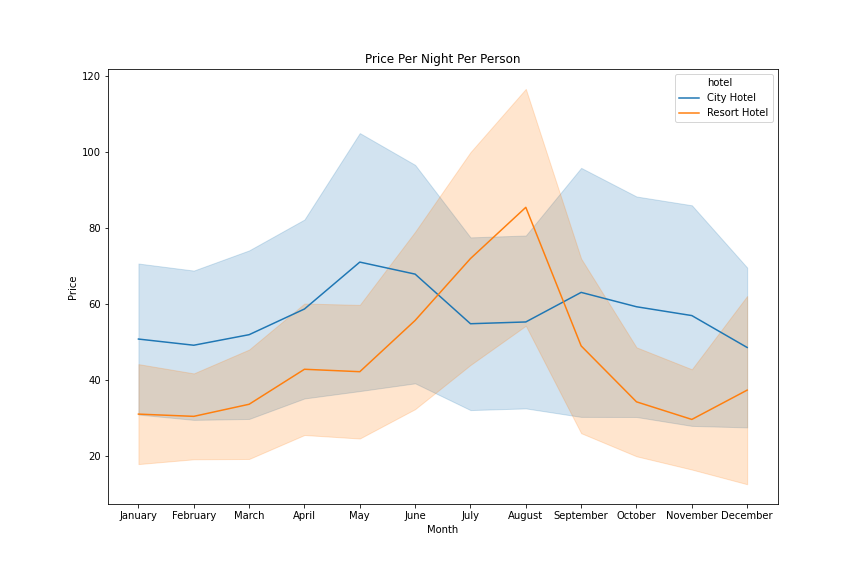

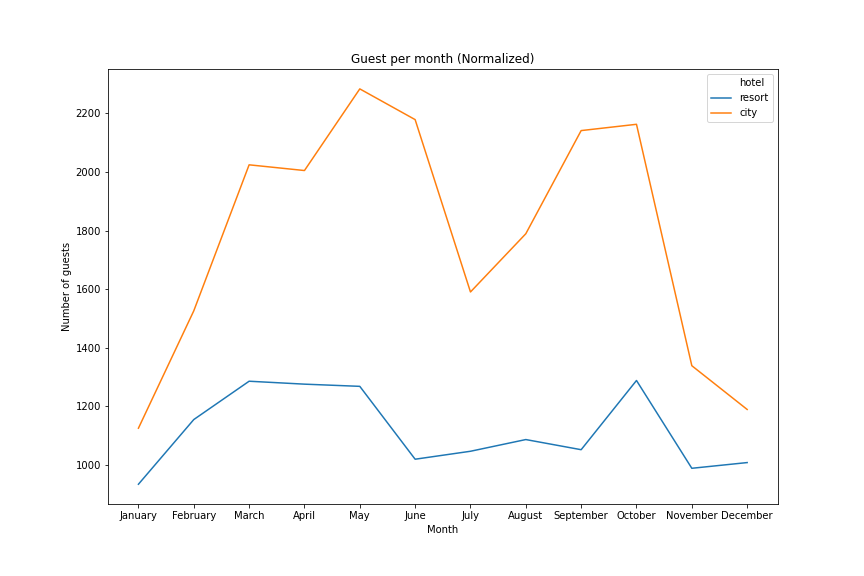

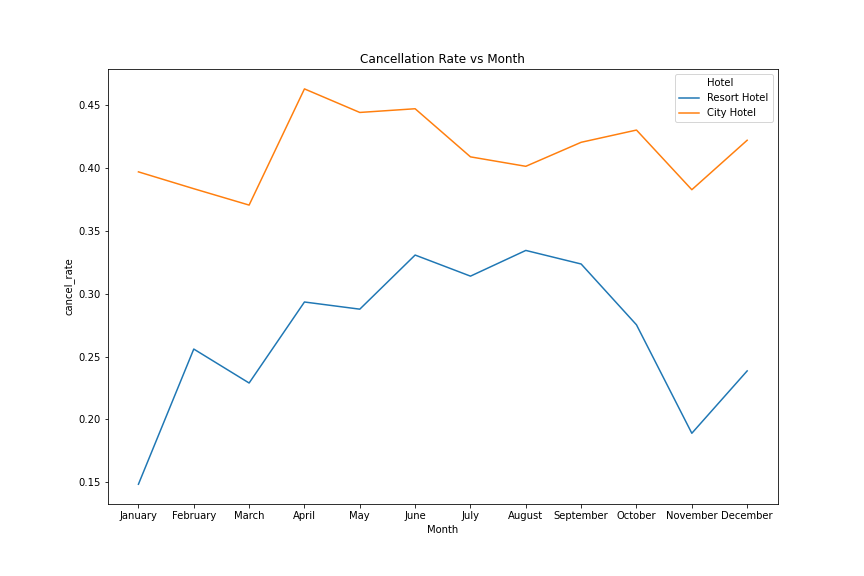

In [473]:
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/Price_Per_Night_Per_Person.png',width=500, height=500))
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/Guest_per_month.png',width=500, height=500))
display(Image(filename='D:/Jupyter_Notebook/Hotel_Demand/figs/Cancellation_Rate_by_Month.png',width=500, height=500))